<a href="https://colab.research.google.com/github/abiflynn/data_analysis_python/blob/main/data_exploration/category_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Searching for the category

In [34]:
import pandas as pd

In [35]:
# our clean products data
products_qu = pd.read_csv("products_qu.csv")

In [36]:
product_category_df = products_qu.copy()

In [42]:
product_category_df

,sku,name,desc,price,in_stock,type,man
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,RAI
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,APP
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,APP
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,APP
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,KIN
...,...,...,...,...,...,...,...
9941,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,BEL
9942,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,THU
9943,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,THU
9944,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,THU


# Challenge. Your categories

In [38]:
#Claras code
def SearchCat (typenumber):
  list_1 = product_category_df.loc[product_category_df["type"] == typenumber, ["name", "desc", "price"]].sort_values(by="price")
  stat_1 = product_category_df.loc[product_category_df["type"] == typenumber].describe()
  return list_1, stat_1

In [39]:
SearchCat(13855401)

(                                                   name  \
 7943  Macally Keyboard Protector TPU MacBook Pro Tou...   
 4411  Macally Keyboard Magic Keyboard Protector Tran...   
 6952  Logitech Desktop MK120 Keyboard and USB Mouse ...   
 5399  Logitech K400 Wireless Touch Plus Wireless Key...   
 2578  Logitech K400 Wireless Touch Plus Wireless Key...   
 2582  Logitech K400 Wireless Touch Plus Wireless Key...   
 2826  Logitech Keyboard K380 Multi-Device Blue for i...   
 3129  Logitech Keyboard K380 Multi-Device Black for ...   
 5748               Satechi Slim Keypad Bluetooth Silver   
 645                  NexGen LMP Bluetooth Keypad KeyPad   
 2432  Multi-Device Logitech K480 Keyboard for iPad /...   
 5928           Satechi Slim Bluetooth Keypad Gray Space   
 1060           NewerTech Aluminum Wireless Keypad White   
 33                      KeyPad LMP Bluetooth Keypad Mac   
 9213       Like new - Apple Mac Keyboard Keypad Spanish   
 1                     Apple Mac Keyboar

In [7]:
product_category_df["category"] = ""
product_category_df.head()

,sku,name,desc,price,in_stock,type,man,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,RAI,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,APP,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,APP,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,APP,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,KIN,


In [8]:
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("keyboard", case=False), "category"] = "keyboard"
product_category_df.loc[product_category_df["name"].str.lower().str.contains("^.{0,7}apple iphone", case=False), "category"] = "smartphone"
product_category_df.loc[product_category_df["name"].str.lower().str.contains("^.{0,7}apple ipod", case=False), "category"] = "ipod"
product_category_df.loc[product_category_df["name"].str.lower().str.contains("^.{0,7}apple ipad|tablet", case=False), "category"] = "tablet"
product_category_df.loc[product_category_df["name"].str.lower().str.contains("imac|mac mini|mac pro", case=False), "category"] = "laptop"
product_category_df.loc[product_category_df["name"].str.lower().str.contains("mouse", case=False), "category"] = "mouse"

In [9]:
product_category_df["category"].value_counts()

category
              8331
laptop         911
tablet         310
smartphone     233
keyboard        81
ipod            42
mouse           38
Name: count, dtype: int64

In [10]:
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("wireless"), :]

,sku,name,desc,price,in_stock,type,man,category
23,MOB0007,Mobee Magic Charger Charger Magic Mouse,Wireless Charger for Magic Mouse,49.99,0,12355400,MOB,mouse
64,HGD0012,Henge Docks Click keyboard support iMac,Base to hold the Apple Magic TrackPad and Wire...,29.00,0,8696,HGD,laptop
74,WAC0040,Wacom Bamboo Wireless Kit / Intuos graphics ta...,Wireless Kit Wacom graphics tablets.,39.99,1,101781405,WAC,tablet
95,WAC0058,Wacom Intuos 5/4 Grip Pen (Replacement pen) Ma...,wireless stylus Mac and PC.,79.99,0,1229,WAC,
129,DLK0008,D-Link DCS-932L Wireless IP Camera Cloud,Wireless network camera day and night home wit...,79.99,0,9094,DLK,
...,...,...,...,...,...,...,...,...
9866,NET0041,Netgear Arlo Wire-Free Security System 4 HD ca...,100% wireless HD night vision for indoor or ou...,579.99,0,9094,NET,
9867,NET0038,Additional Arlo Pro Netgear Security Camera,Additional security camera Intelligent recharg...,249.99,0,9094,NET,
9873,NET0042,Arlo Netgear HD Camera Wire-Free Additional Ba...,Additional 100% HD camera with night vision wi...,149.99,0,9094,NET,
9896,QAR0007,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,QAR,


In [11]:
product_category_df.loc[product_category_df["desc"].str.lower().str.contains("keyboard"), :].head(50)

,sku,name,desc,price,in_stock,type,man,category
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,APP,keyboard
15,MOS0021,Clearguard Moshi MacBook Pro and Air,Keyboard Protector MacBook Pro 13-inch Retina ...,24.95,0,13835403,MOS,keyboard
24,APP0277,Apple Wireless Keyboard Keyboard (OEM) Mac,Ultrathin keyboard Apple Bluetooth Spanish (un...,79.00,0,13855401,APP,keyboard
64,HGD0012,Henge Docks Click keyboard support iMac,Base to hold the Apple Magic TrackPad and Wire...,29.00,0,8696,HGD,laptop
363,LOG0084,Logitech Ultrathin Keyboard Cover Keyboard Cov...,Ultrathin cover and cover with Bluetooth keybo...,89.99,0,12575403,LOG,keyboard
573,MOS0105,Moshi Clearguard CS Keyboard Protector,Transparent protective keyboard.,19.99,0,13835403,MOS,keyboard
1359,LOG0144,Logitech Keys-To-Go iPad Keyboard Black,Bluetooth wireless mechanical keyboard in Span...,71.99,0,54025401,LOG,keyboard
1361,LOG0156,Logitech iPad Keys-To-Go Keyboard Red,Bluetooth wireless mechanical keyboard in Span...,71.99,0,54025401,LOG,keyboard
1383,LOG0148,Logitech Type + Keyboard Folio iPad Air 2 Black,Keyboard Case for iPad Air 2.,119.00,0,12575403,LOG,keyboard
1422,KEN0200,Kensington KeyFolio Plus X2 Thin Case with bac...,Cover with Spanish backlit keyboard for iPad A...,109.99,0,12575403,KEN,keyboard


## 4.&nbsp; Using `type` to create categories


In [12]:
category_type_df = products_qu.copy()

In [13]:
n = 50
print(f"With the {n} largest types, we account for {((category_type_df.groupby('type').count().nlargest(n, 'sku')['sku'].sum()) / (category_type_df.shape[0]) * 100).round(2)}% of all products.")

With the 50 largest types, we account for 89.5% of all products.


In [14]:
# To check the name and description of the product
# Change the number un the type column and determine its type

mask_3 = category_type_df['type'] == 13855401
category_type_df.loc[mask_3, ['name', 'type', 'desc']].tail(50)

,name,type,desc
1,Apple Mac Keyboard Keypad Spanish,13855401,USB ultrathin keyboard Apple Mac Spanish.
24,Apple Wireless Keyboard Keyboard (OEM) Mac,13855401,Ultrathin keyboard Apple Bluetooth Spanish (un...
33,KeyPad LMP Bluetooth Keypad Mac,13855401,expansion keypad Mac with bluetooth connection.
645,NexGen LMP Bluetooth Keypad KeyPad,13855401,expansion keypad Mac with Bluetooth connection.
1060,NewerTech Aluminum Wireless Keypad White,13855401,expansion keypad Mac with Bluetooth connection.
2432,Multi-Device Logitech K480 Keyboard for iPad /...,13855401,Keying with bluetooth for iPad iPhone and Mac.
2544,Apple Keyboard Keypad International English Mac,13855401,USB ultrathin keyboard Apple Mac English.
2578,Logitech K400 Wireless Touch Plus Wireless Key...,13855401,Wireless keyboard with integrated trackpad.
2582,Logitech K400 Wireless Touch Plus Wireless Key...,13855401,Spanish wireless keyboard with integrated trac...
2826,Logitech Keyboard K380 Multi-Device Blue for i...,13855401,wireless keyboard multi device.


In [15]:
# List of the numbers in the type column

type_num_list = category_type_df['type'].unique().tolist()
type_num_list

[8696,
 13855401,
 1387,
 1230,
 1364,
 1325,
 5384,
 1334,
 13005399,
 13835403,
 12995397,
 11865403,
 13955395,
 1216,
 12355400,
 549000000,
 1276,
 11905404,
 12635403,
 12755395,
 1296,
 12285400,
 1229,
 11935397,
 12655397,
 1404,
 101781405,
 4259,
 14035403,
 12085400,
 1282,
 12175397,
 1424,
 9094,
 1405,
 57445397,
 14305406,
 10142,
 12645406,
 10230,
 12215397,
 11821715,
 13555403,
 14365395,
 144000000,
 5405,
 5395,
 5398,
 21485407,
 20642062,
 1280,
 12575403,
 1433,
 1515,
 5720,
 1298,
 13615399,
 12585395,
 1392,
 1231,
 15435404,
 1375,
 42945397,
 12141714,
 54025401,
 21535407,
 1416,
 217000000,
 24215399,
 11434,
 2425,
 2434,
 2449,
 13621714,
 24861714,
 24821716,
 574000000,
 54864259,
 51861714,
 1714,
 51601716,
 51871714,
 5403,
 54085407,
 24885185,
 24895185,
 5407,
 5406,
 5404,
 544000000,
 85641716,
 42931714,
 24811716,
 85651716,
 2158,
 102000000,
 51882158,
 543000000,
 572000000,
 5401,
 12051714,
 929000000,
 5399,
 1716,
 21622158,
 5390000

CATEGORIES

Cases & Protectors (Cases / Protectors)

Storage Devices (Hard Drives, Data Storage, Memory Card/USB) – Now includes Computer Memory

Laptops & Computers (Laptops, Computers)

Accessories & Peripherals (Accessories, Adaptors/Cables, Stands/Mounts)

Repair & Maintenance (Repair Kits, Open/Second Hand - Misc)

Monitors & Display (Monitor)

Audio & Sound (Headphones, Speakers)

Smartwatches & Accessories (Smart Watch, Smart Watch Straps, Smart Watch Chargers)

Mobile Phones & Accessories (Phones, Chargers)

Tablets & E-Readers (Tablets, Smartpen)

Cameras & Photography (Cameras, iPods)

Power & Batteries (Batteries/PB)

Miscellaneous (Any remaining uncategorized items)

In [16]:
category_type_df.loc[category_type_df["type"] == 11865403, "category"] = "Cases & Protectors" 
category_type_df.loc[category_type_df["type"] == 12175397, "category"] = "Storage Devices" 
category_type_df.loc[category_type_df["type"] == 1298, "category"] = "Open & Second Hand - Misc" 
category_type_df.loc[category_type_df["type"] == 11935397, "category"] = "Storage Devices" 
category_type_df.loc[category_type_df["type"] == 11905404, "category"] = "Accessories & Peripherals" 
category_type_df.loc[category_type_df["type"] == 1282, "category"] = "Laptops & Computers" 
category_type_df.loc[category_type_df["type"] == 12635403, "category"] = "Cases & Protectors"
category_type_df.loc[category_type_df["type"] == 13835403, "category"] = "Cases & Protectors" 
category_type_df.loc[category_type_df["type"] == 574000000, "category"] = "Laptops & Computers" 
category_type_df.loc[category_type_df["type"] == 1364, "category"] = "Storage Devices"
category_type_df.loc[category_type_df["type"] == 1296, "category"] = "Monitors & Display"
category_type_df.loc[category_type_df["type"] == 1325, "category"] = "Accessories & Peripherals"
category_type_df.loc[category_type_df["type"] == 12585395, "category"] = "Accessories & Peripherals"
category_type_df.loc[category_type_df["type"] == 5384, "category"] = "Audio & Sound"
category_type_df.loc[category_type_df["type"] == 1433, "category"] = "Storage Devices"
category_type_df.loc[category_type_df["type"] == 12215397, "category"] = "Storage Devices"
category_type_df.loc[category_type_df["type"] == 5398, "category"] = "Audio & Sound"
category_type_df.loc[category_type_df["type"] == 102000000, "category"] = "Laptops & Computers"
category_type_df.loc[category_type_df["type"] == 144000000, "category"] = "Repair & Maintenance"
category_type_df.loc[category_type_df["type"] == 57445397, "category"] = "Storage Devices"
category_type_df.loc[category_type_df["type"] == 1334, "category"] = "Networking Devices"
category_type_df.loc[category_type_df["type"] == 2158, "category"] = "Laptops & Computers"
category_type_df.loc[category_type_df["type"] == 2449, "category"] = "Smartwatches & Accessories"
category_type_df.loc[category_type_df["type"] == 12655397, "category"] = "Storage Devices"
category_type_df.loc[category_type_df["type"] == 1229, "category"] = "Tablets & E-Readers"
category_type_df.loc[category_type_df["type"] == 12995397, "category"] = "Storage Devices"
category_type_df.loc[category_type_df["type"] == 1515, "category"] = "Power & Batteries"
category_type_df.loc[category_type_df["type"] == 13615399, "category"] = "Mobile Phones & Accessories"
category_type_df.loc[category_type_df["type"] == 13555403, "category"] = "Cases & Protectors"
category_type_df.loc[category_type_df["type"] == 1405, "category"] = "Tablets & E-Readers"
category_type_df.loc[category_type_df["type"] == 1230, "category"] = "Accessories & Peripherals"
category_type_df.loc[category_type_df["type"] == 118692158, "category"] = "Laptops & Computers"
category_type_df.loc[category_type_df["type"] == 1216, "category"] = "Accessories & Peripherals"
category_type_df.loc[category_type_df["type"] == 24885185, "category"] = "Smartwatches & Accessories"
category_type_df.loc[category_type_df["type"] == 24895185, "category"] = "Smartwatches & Accessories"
category_type_df.loc[category_type_df["type"] == 21485407, "category"] = "Repair & Maintenance"
category_type_df.loc[category_type_df["type"] == 1392, "category"] = "Backpacks"
category_type_df.loc[category_type_df["type"] == 11821715, "category"] = "Cameras & Photography"
category_type_df.loc[category_type_df["type"] == 8696, "category"] = "Accessories & Peripherals"
category_type_df.loc[category_type_df["type"] == 9094, "category"] = "Cameras & Photography"
category_type_df.loc[category_type_df["type"] == 539000000, "category"] = "Laptops & Computers"
category_type_df.loc[category_type_df["type"] == 549000000, "category"] = "Power & Batteries"
category_type_df.loc[category_type_df["type"] == 13005399, "category"] = "Power & Batteries"
category_type_df.loc[category_type_df["type"] == 42945397, "category"] = "Storage Devices"
category_type_df.loc[category_type_df["type"] == 12645406, "category"] = "Repair & Maintenance"
category_type_df.loc[category_type_df["type"] == 51601716, "category"] = "Mobile Phones & Accessories"
category_type_df.loc[category_type_df["type"] == 216000000, "category"] = "Laptops & Computers"
category_type_df.loc[category_type_df["type"] == 85651716, "category"] = "Mobile Phones & Accessories"
category_type_df.loc[category_type_df["type"] == 24215399, "category"] = "Smartwatches & Accessories"
category_type_df.loc[category_type_df["type"] == 5720, "category"] = "Accessories & Peripherals"
category_type_df.loc[category_type_df["type"] == 14305406, "category"] = "Repair & Maintenance"



In [40]:
#Code for searching category for insights
def SearchCat (typenumber):
  list_1 = category_type_df.loc[category_type_df["type"] == typenumber, ["name", "desc", "price"]].sort_values(by="price")
  stat_1 = category_type_df.loc[category_type_df["type"] == typenumber].describe()
  return list_1, stat_1

In [41]:
SearchCat(14305406)

(                                                   name  \
 4670                   iFixit Demagnetizer / Magnetizer   
 4270  iFixit Battery Battery Isolation Pick pua iPad...   
 4687                          iFixit Mac mini Tool 2010   
 4677  iFixit Destornilador Tri-point Y00 A1278 Macbo...   
 4234  Security Torx screwdriver TR6 iFixit Mac Mini ...   
 161                   OWC Kit of 5 tools for Mac and PC   
 3455  iFixit rubber Kit for MacBook and MacBook Pro ...   
 4674  iFixit Y1 Tri-wing Screwdriver Tool Apple 922-...   
 4682  iFixit fine Spatula 15 "Mac mini and iPod Classic   
 9359  Open - iFixit P6 Battery Pentalobe screwdriver...   
 4091  iFixit P6 Battery Pentalobe screwdriver Macboo...   
 4092    iFixit iMac Opening Tool to open iMac Late 2012   
 146                       NewerTech windy 225 "for iMac   
 4688                           iFixit CuI ± a foam iMac   
 3551  iFixit Screw Kit for MacBook Pro 13 "/ 15" / 17 "   
 4678              iFixit September 3 Pr

In [17]:
category_type_df["category"].value_counts()

category
Storage Devices                2431
Cases & Protectors             1763
Accessories & Peripherals      1064
Laptops & Computers            1018
Open & Second Hand - Misc       783
Audio & Sound                   337
Smartwatches & Accessories      282
Repair & Maintenance            277
Monitors & Display              187
Tablets & E-Readers             179
Power & Batteries               167
Mobile Phones & Accessories     163
Networking Devices              115
Cameras & Photography           108
Backpacks                        65
Name: count, dtype: int64

In [18]:
#Check the Nan values 
#Create a dataframe having only Nan values in the category column   
mask_null = category_type_df['category'].isnull() == True
category_type_nan = category_type_df.loc[mask_null]
category_type_nan

,sku,name,desc,price,in_stock,type,man,category
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,APP,NaN
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,APP,NaN
19,APP0234,Apple Dock Connector to VGA,Dock Connector to VGA IOS.,35.00,0,13955395,APP,NaN
21,APP0233,Apple iPad Camera Connection connector,IPad connector for digital cameras and SD cards.,35.00,0,13955395,APP,NaN
23,MOB0007,Mobee Magic Charger Charger Magic Mouse,Wireless Charger for Magic Mouse,49.99,0,12355400,MOB,NaN
...,...,...,...,...,...,...,...,...
9884,APP1973-A,Open - Apple iPad Wi-Fi 128GB Space Gray,Apple iPad Wi-Fi 128GB Space Gray (MP2H2TY / A),502.81,0,113851714,APP,NaN
9886,APP1472,Apple Magic Keyboard English International,English keyboard Mac and Apple iPad Ultrathin ...,119.00,1,13855401,APP,NaN
9911,APP1466,Apple Magic Mouse 2 (OEM),Apple Bluetooth wireless mouse original box,89.00,1,1387,APP,NaN
9936,ICA0115,"Incase City Brief case MacBook Pro 13 ""Black",Incase bag to carry Apple MacBook Pro 13-inch,79.95,1,10230,ICA,NaN


In [19]:
#Investigate more and assign more categories 

category_type_nan.loc[category_type_nan["desc"].str.lower().str.contains("battery|charger", case=False), "category"] = "Power & Batteries"
category_type_nan.loc[category_type_nan["desc"].str.lower().str.contains("adapter|cable|support|connector|stand", case=False), "category"] = "Accessories & Peripherals"
category_type_nan.loc[category_type_nan["desc"].str.lower().str.contains("protector|case", case=False), "category"] = "Cases & Protectors"
category_type_nan.loc[category_type_nan["desc"].str.lower().str.contains("microphone", case=False), "category"] = "Audio & Sound"
category_type_nan.loc[category_type_nan["desc"].str.lower().str.contains("watch|strap", case=False), "category"] = "Smartwatches & Accessories"
category_type_nan.loc[category_type_nan["desc"].str.lower().str.contains("installation|warranty", case=False), "category"] = "Other"

In [20]:
#Check how many Nan values left
category_type_nan.isnull().sum()

sku           0
name          0
desc          0
price         0
in_stock      0
type          0
man           0
category    749
dtype: int64

In [21]:
#update the original dataframe with new category values
category_type_df.update(category_type_nan)

In [22]:
category_type_df["category"] = category_type_df["category"].fillna("Other")

In [23]:
category_type_df["category"].value_counts()

category
Storage Devices                2431
Cases & Protectors             1815
Accessories & Peripherals      1148
Laptops & Computers            1018
Open & Second Hand - Misc       783
Other                           774
Audio & Sound                   347
Smartwatches & Accessories      329
Repair & Maintenance            277
Power & Batteries               207
Monitors & Display              187
Tablets & E-Readers             179
Mobile Phones & Accessories     163
Networking Devices              115
Cameras & Photography           108
Backpacks                        65
Name: count, dtype: int64

In [24]:
n = 30
print(f"With the {n} largest types, we account for {((category_type_df.groupby('type').count().nlargest(n, 'sku')['sku'].sum()) / (category_type_df.shape[0]) * 100).round(2)}% of all products.")

With the 30 largest types, we account for 78.77% of all products.


In [25]:
url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=share_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path, sep =",")

In [26]:
brands_df = brands.copy()

In [27]:
brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [28]:
#Mapping with brand short names and long names
brand_mapping = dict(zip(brands_df["short"], brands_df["long"]))

#Mapping the dictionary on the man column
category_type_df["brand"] = category_type_df["man"].map(brand_mapping)


In [30]:
category_type_df

,sku,name,desc,price,in_stock,type,man,category,brand
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,RAI,Accessories & Peripherals,Rain Design
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,APP,Other,Apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,APP,Accessories & Peripherals,Apple
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,APP,Accessories & Peripherals,Apple
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,KIN,Storage Devices,Kingston
...,...,...,...,...,...,...,...,...,...
9941,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,BEL,Smartwatches & Accessories,Belkin
9942,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,THU,Backpacks,Thule
9943,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,THU,Backpacks,Thule
9944,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,THU,Backpacks,Thule


In [31]:
category_10_most = (
                         category_type_df.groupby("brand", as_index=False)
                         ["price"].sum()
                         .nlargest(10, "price")
                         )
category_10_most

,brand,price
6,Apple,2967958.60
108,Pack,2387524.44
39,G-Technology,149506.87
68,LaCie,110107.08
101,OWC,105626.69
119,QNAP,101363.77
147,Synology,81306.36
163,Wacom,67511.43
115,Promise,44933.43
164,Western Digital,43325.47


In [32]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

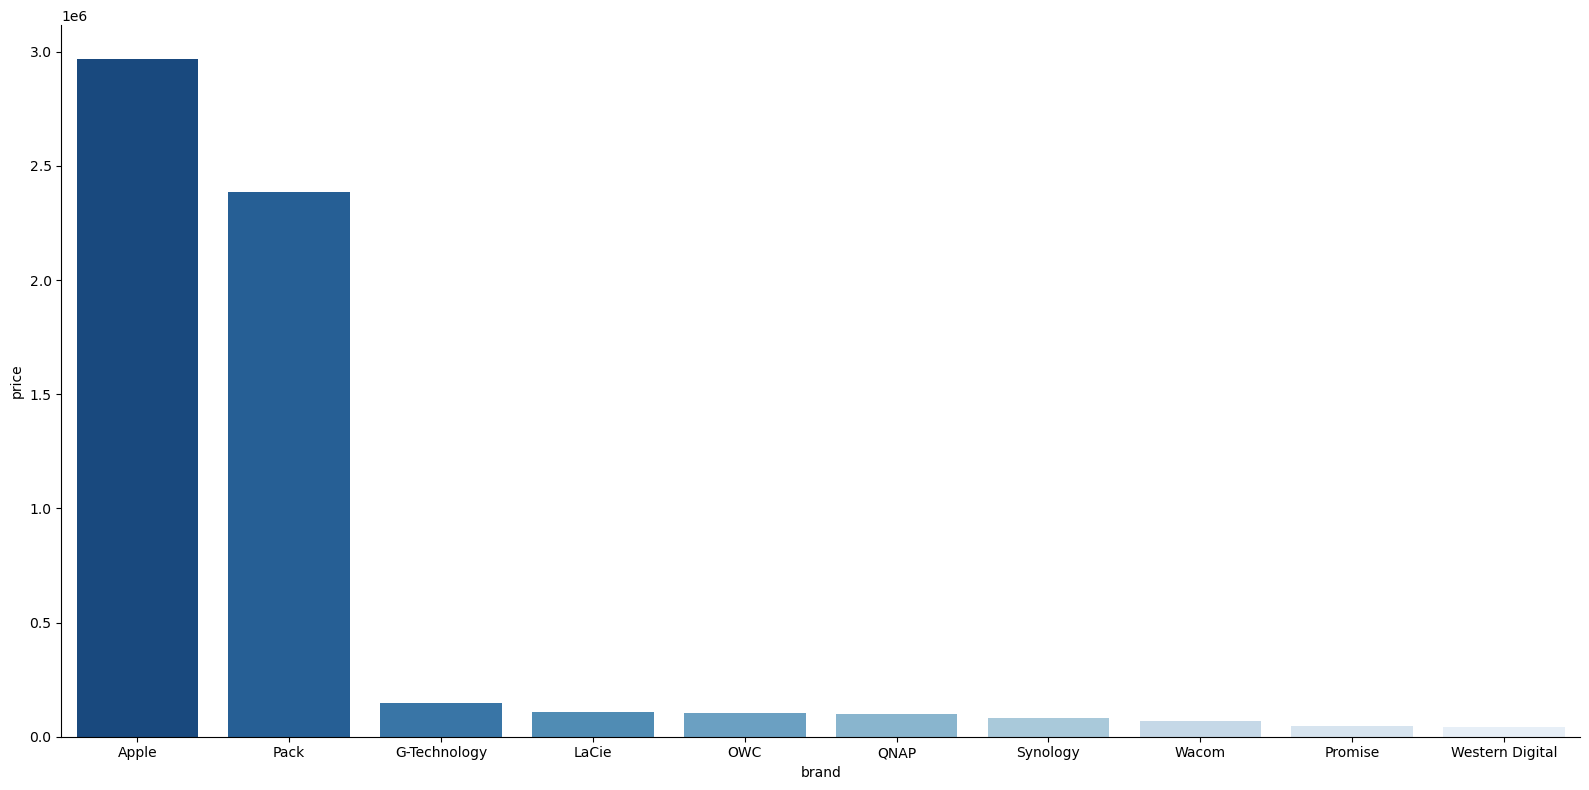

In [33]:
sns.catplot(kind="bar",
           data=category_10_most,
           x="brand",
           y="price",
           height=8,
           aspect=2,
           palette="Blues_r");